In [1]:
import os
import sys

import boto3
import pandas as pd
from dotenv import load_dotenv

pd.options.display.max_columns = False

dir_resource_minio = os.path.join(os.getcwd(), '..', 'src', 'resources')
sys.path.append(dir_resource_minio)
from boto3_manager import PandasBucket

load_dotenv(os.path.join(os.getcwd(), '..', '.env'))

minio_client = boto3.client(
    's3',
    endpoint_url='http://localhost:9000',  # Correct API port
    aws_access_key_id=os.getenv('ACCESS_KEY'),
    aws_secret_access_key=os.getenv('SECRET_KEY'),
    region_name='us-east-1',
)

buckets = minio_client.list_buckets()

In [2]:
cnx_s3 = PandasBucket(client=minio_client, name='resident-evil')
data = cnx_s3.read_parquet(name='silver/person_characters.parquet')

### Dados brutos

* Explorando a base com a separação das aparicoes por personagens

In [3]:
def explode_dataframe(df: pd.DataFrame, col: str) -> pd.DataFrame:
    return df.explode(col, ignore_index=True)

In [4]:
df_exploded = explode_dataframe(data, 'aparicoes')
df_exploded['aparicoes'] = (
    df_exploded['aparicoes'].str.lower().str.capitalize()
)
df_exploded

,aparicoes,link,name,ano_de_nascimento,tipo_sanguineo,altura,peso,pathimage,IngestionDate,IngestionTime,Source
0,Biohazard / resident evil 2 (1998),https://www.residentevildatabase.com/ada-wong/,ada-wong,1974,AB,NaN,NaN,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil
1,Biohazard / resident evil 4 (2005),https://www.residentevildatabase.com/ada-wong/,ada-wong,1974,AB,NaN,NaN,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil
2,Biohazard / resident evil: the umbrella chroni...,https://www.residentevildatabase.com/ada-wong/,ada-wong,1974,AB,NaN,NaN,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil
3,Biohazard / resident evil: the darkside chroni...,https://www.residentevildatabase.com/ada-wong/,ada-wong,1974,AB,NaN,NaN,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil
4,Biohazard / resident evil: operation raccoon c...,https://www.residentevildatabase.com/ada-wong/,ada-wong,1974,AB,NaN,NaN,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil
...,...,...,...,...,...,...,...,...,...,...,...
359,Biohazard / resident evil: operation raccoon c...,https://www.residentevildatabase.com/willow-ca...,willow-caroline-floyd,Desconhecido,Desconhecido,NaN,NaN,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil
360,Biohazard / resident evil: infinite darkness (...,https://www.residentevildatabase.com/wilson-se...,wilson-secretario-seguranca,Desconhecido,Desconhecido,NaN,NaN,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil
361,Biohazard / resident evil outbreak (2003),https://www.residentevildatabase.com/yoko-suzuki/,yoko-suzuki,1978,Desconhecido,1.63,58.0,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil
362,Biohazard / resident evil outbreak file #2 (2004),https://www.residentevildatabase.com/yoko-suzuki/,yoko-suzuki,1978,Desconhecido,1.63,58.0,https://www.residentevildatabase.com/wp-conten...,2024-11-16,15:54:34,DataResidentEvil


### **1.** Top Personagens Populares

In [13]:
def top_10_most_popular_appearances(df_exploded: pd.DataFrame) -> pd.DataFrame:
    """
    Ordenar por número de aparições e selecionar os top 10
    """
    top_popular = (
        df_exploded.groupby('aparicoes')['name']
        .count()
        .reset_index(name='count')
    )
    top_popular = top_popular.sort_values(by='count', ascending=False).head(10)
    return top_popular


df_top_10_most_popular_appearances = top_10_most_popular_appearances(
    df_exploded
)
df_top_10_most_popular_appearances

,aparicoes,count
34,Biohazard / resident evil: the darkside chroni...,22
30,Biohazard / resident evil: operation raccoon c...,21
23,Biohazard / resident evil village (2021),16
13,Biohazard / resident evil 7 (2017),15
36,Biohazard / resident evil: the umbrella chroni...,14
12,Biohazard / resident evil 6 (2012),13
6,Biohazard / resident evil 2 (1998),13
19,Biohazard / resident evil remake (2002),13
9,Biohazard / resident evil 5 (2009),12
45,Biohazard re:2 / resident evil 2 (2019),12


### **2.** Distribuição por Tipo Sanguíneo

In [6]:
def blood_type_distribution(data: pd.DataFrame) -> pd.DataFrame:
    """
    Contagem de personagens por tipo sanguíneo
    """
    blood_type_count = data['tipo_sanguineo'].value_counts().reset_index()
    print('Distribuição por Tipo Sanguíneo:')
    print(blood_type_count)
    return blood_type_count


df_blood_type = blood_type_distribution(data)

Distribuição por Tipo Sanguíneo:
  tipo_sanguineo  count
0   Desconhecido    131
1              O      9
2              A      9
3             AB      6
4              B      3
5             B+      1
6             A-      1
7            AB+      1
8            AB-      1
9             O+      1


### **3.** Média de Altura por Tipo Sanguíneo

In [7]:
def average_height_and_weight_by_blood_type(df: pd.DataFrame) -> pd.DataFrame:
    """
    Obter Média de Altura por Tipo Sanguíneo
    """
    mean_physics = (
        df.groupby('tipo_sanguineo')[['altura', 'peso']].mean().reset_index()
    )
    print('Média de Altura e Peso por Tipo Sanguíneo:')
    print(mean_physics)
    return mean_physics


df_agg_by_blood = average_height_and_weight_by_blood_type(data)

Média de Altura e Peso por Tipo Sanguíneo:
  tipo_sanguineo    altura       peso
0              A  1.821111  83.600000
1             A-       NaN        NaN
2             AB  1.686667  57.033333
3            AB+  1.650000  52.000000
4            AB-       NaN        NaN
5              B  1.806667  70.100000
6             B+       NaN        NaN
7   Desconhecido  1.800625  70.441379
8              O  1.806250  75.962500
9             O+       NaN        NaN


### **4.** Gráfico: Altura x Peso

In [8]:
import matplotlib.pyplot as plt

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

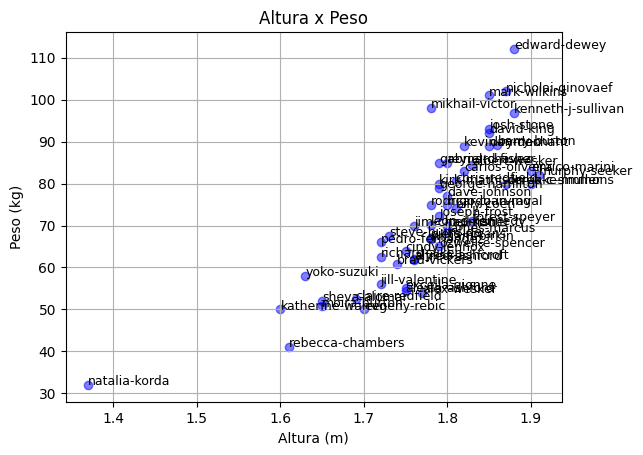

In [9]:
# Gráfico de dispersão
plt.scatter(data['altura'], data['peso'], c='blue', alpha=0.5)
for i, name in enumerate(data['name']):
    plt.text(data['altura'][i], data['peso'][i], name, fontsize=9)

plt.title('Altura x Peso')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(True)
plt.show()

### **5.** Qunatidade de Aparições por Personagens

In [10]:
def top_10_characters_with_most_appearances(
    df_exploded: pd.DataFrame,
) -> pd.DataFrame:
    df_count_appearances = (
        df_exploded.groupby(['name'])['aparicoes']
        .count()
        .reset_index(name='count')
    )
    top_10 = df_count_appearances.sort_values(
        by='count', ascending=False
    ).head(10)
    return top_10.reset_index(drop=True)


top_10_characters_with_most_appearances(df_exploded)

,name,count
0,chris-redfield,18
1,leon-s-kennedy,13
2,albert-wesker,12
3,claire-redfield,12
4,jill-valentine,11
5,rebecca-chambers,10
6,ada-wong,9
7,hunk,8
8,barry-burton,8
9,ozwell-e-spencer,7
